This notebook provides code for bivariate analysis of building count and building footprint data for individual station areas and allows users to filter this information by transit mode and transit agency

In [ ]:
pip install ipywidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.3 MB/s eta 0:00:00


# **Filter Building Count and Square Footage by Transit Mode**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import ipywidgets as widgets
from IPython.display import display

# Load your data
data = pd.read_csv('/content/Independent_Variables_LAND_USES.csv')  # Replace with your file path

# Normalizing the 'Building Count' and 'Total Building Footprint' data
scaler = MinMaxScaler()
data[['Building Count Normalized', 'Total Building Footprint Normalized']] = scaler.fit_transform(data[['Building Count', 'Building Footprint']])

# Calculating overall medians for the entire dataset
overall_median_building_count = data['Building Count Normalized'].median()
overall_median_building_footprint = data['Total Building Footprint Normalized'].median()

# Function to update the scatter plot based on the selected 'Primary Mode Served'
def update_scatter_plot(primary_mode_served):
    filtered_data = data[data['Primary Mode Served'] == primary_mode_served]

    # Scatter plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Building Count Normalized', y='Total Building Footprint Normalized', data=filtered_data)

    # Adding constant median lines for overall data
    plt.axvline(overall_median_building_count, color='green', linestyle='--', label='Overall Median Building Count')
    plt.axhline(overall_median_building_footprint, color='blue', linestyle='--', label='Overall Median Building Footprint')

    plt.xlabel('Normalized Building Count')
    plt.ylabel('Normalized Total Building Footprint')
    plt.title(f'Scatter Plot for {primary_mode_served}')
    plt.legend()
    plt.show()

# Dropdown widget for 'Primary Mode Served'
modes = data['Primary Mode Served'].unique()
dropdown = widgets.Dropdown(options=modes, description='Primary Mode:')
widgets.interactive(update_scatter_plot, primary_mode_served=dropdown)


interactive(children=(Dropdown(description='Primary Mode:', options=('Commuter Rail', 'Light Rail', 'Heavy Rai…

## **Filter Buildng Count and Footprint by Transit Agency**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import ipywidgets as widgets
from IPython.display import display

# Load your data
data = pd.read_csv('/content/Independent_Variables_LAND_USES.csv')  # Replace with your file path

# Normalizing the 'Building Count' and 'Total Building Footprint' data
scaler = MinMaxScaler()
data[['Building Count Normalized', 'Total Building Footprint Normalized']] = scaler.fit_transform(data[['Building Count', 'Building Footprint']])

# Calculating overall medians for the entire dataset
overall_median_building_count = data['Building Count Normalized'].median()
overall_median_building_footprint = data['Total Building Footprint Normalized'].median()

# Function to update the scatter plot based on the selected 'Agency Name'
def update_scatter_plot(agency_name):
    filtered_data = data[data['Agency Name'] == agency_name]

    # Scatter plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Building Count Normalized', y='Total Building Footprint Normalized', data=filtered_data)

    # Adding constant median lines for overall data
    plt.axvline(overall_median_building_count, color='green', linestyle='--', label='Overall Median Building Count')
    plt.axhline(overall_median_building_footprint, color='blue', linestyle='--', label='Overall Median Building Footprint')

    plt.xlabel('Normalized Building Count')
    plt.ylabel('Normalized Total Building Footprint')
    plt.title(f'Scatter Plot for Agency: {agency_name}')
    plt.legend()
    plt.show()

# Searchable dropdown widget for 'Agency Name'
agencies = tuple(data['Agency Name'].unique())  # Convert to tuple
dropdown = widgets.Combobox(options=agencies, description='Agency:', placeholder='Type to search...')
widgets.interactive(update_scatter_plot, agency_name=dropdown)


interactive(children=(Combobox(value='', description='Agency:', options=('Metro-North Commuter Railroad Compan…

# **Provide Global Information on Building Count and Footprint**

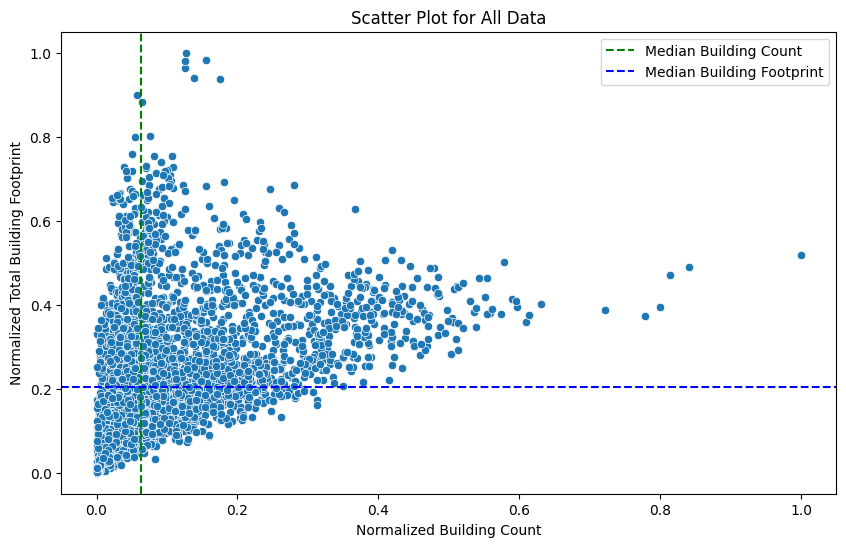

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Load your data
data = pd.read_csv('/content/Independent_Variables_LAND_USES.csv')  # Replace with your file path

# Normalizing the 'Building Count' and 'Total Building Footprint' data
scaler = MinMaxScaler()
data[['Building Count Normalized', 'Total Building Footprint Normalized']] = scaler.fit_transform(data[['Building Count', 'Building Footprint']])

# Function to create the scatter plot for all data
def create_scatter_plot():
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Building Count Normalized', y='Total Building Footprint Normalized', data=data)

    # Adding median lines for all data
    median_building_count = data['Building Count Normalized'].median()
    median_building_footprint = data['Total Building Footprint Normalized'].median()
    plt.axvline(median_building_count, color='green', linestyle='--', label='Median Building Count')
    plt.axhline(median_building_footprint, color='blue', linestyle='--', label='Median Building Footprint')

    plt.xlabel('Normalized Building Count')
    plt.ylabel('Normalized Total Building Footprint')
    plt.title('Scatter Plot for All Data')
    plt.legend()
    plt.show()

# Calling the function to create the scatter plot
create_scatter_plot()
